In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from optimize import generate_med_points

In [2]:
# create a dummy 2D dataset
data = np.random.uniform(0, 15, (25, 2)) # num data, dimensions
bounds = [(0, 15) for _ in range(data.shape[1])] # bounds for each dimension
X_new = generate_med_points(num_points=5, existing_points=data, bounds=bounds, num_restarts=25)

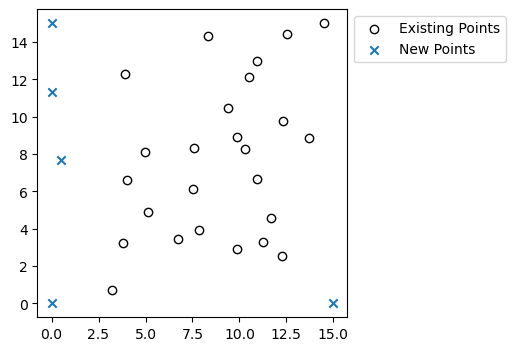

In [3]:
# visualize candidates

# 3D
# fig = plt.figure(figsize=(4,4), dpi=100)
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="Existing Points", fc='w', ec='k', alpha=1.0)
# ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], label="New Points", marker="x", alpha=1.0)
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()

# 2D
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
plt.scatter(data[:, 0], data[:, 1], label="Existing Points", fc='w', ec='k')
plt.scatter(X_new[:, 0], X_new[:, 1], label="New Points", marker="x")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()